About this Notebook
In this notebook, we learn how to use scikit-learn for Polynomial regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate our model using test set, and finally use model to predict unknown value.

In [1]:
#importing needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl


In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-05-28 23:26:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   118KB/s    in 0.6s    

2020-05-28 23:26:47 (118 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



MODELYEAR e.g. 2014

MAKE e.g. Acura

MODEL e.g. ILX

VEHICLE CLASS e.g. SUV

ENGINE SIZE e.g. 4.7

CYLINDERS e.g 6

TRANSMISSION e.g. A6

FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9

FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0


In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [6]:
#selecting ENGINESIZE , CYLINDERS , FUELCONSUMPTION , CO2EMISSIONS for Polynomial Regression
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


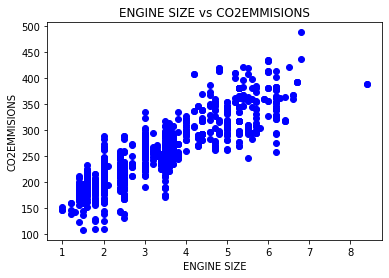

In [7]:
#plotting Emission Values with Engine Size
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2EMMISIONS')
plt.title('ENGINE SIZE vs CO2EMMISIONS')
plt.show()

In [9]:
#Creating Train and Test data set
mask = np.random.rand(len(df))<0.8
train = cdf[mask]
test = cdf[~mask]

In [10]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212
11,3.5,6,10.4,239


In [11]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
10,2.4,4,9.8,225
19,2.0,4,8.8,202
25,2.0,4,10.2,235
31,4.0,8,11.3,260
33,3.0,6,11.2,258
40,2.0,4,9.2,212
41,3.0,6,9.1,246
42,3.0,6,13.2,304
52,4.2,8,13.3,306


In [12]:
train.shape

(866, 4)

In [13]:
test.shape

(201, 4)

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

𝑦=𝑏+𝜃1𝑥+𝜃2𝑥2 
Now, the question is: how we can fit our data on this equation while we have only x values, such as Engine Size? Well, we can create a few additional features: 1,  𝑥 , and  𝑥2 .

PloynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import  linear_model
x_train = np.asanyarray(train[['ENGINESIZE']])
x_test = np.asanyarray(test[['CO2EMISSIONS']])


In [25]:
x_train

array([[2. ],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [5.9],
       [5.9],
       [4.7],
       [4.7],
       [4.7],
       [4.7],
       [5.9],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [6.3],
       [3. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [4. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [6.8],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
      

In [26]:
x_test

array([[221],
       [225],
       [202],
       [235],
       [260],
       [258],
       [212],
       [246],
       [304],
       [306],
       [308],
       [285],
       [285],
       [281],
       [237],
       [380],
       [200],
       [200],
       [237],
       [200],
       [209],
       [237],
       [317],
       [317],
       [209],
       [230],
       [278],
       [290],
       [264],
       [207],
       [251],
       [248],
       [260],
       [382],
       [338],
       [377],
       [258],
       [209],
       [228],
       [292],
       [173],
       [191],
       [317],
       [294],
       [317],
       [290],
       [232],
       [237],
       [294],
       [294],
       [308],
       [186],
       [198],
       [198],
       [278],
       [271],
       [179],
       [138],
       [368],
       [421],
       [382],
       [264],
       [274],
       [308],
       [283],
       [308],
       [343],
       [414],
       [162],
       [196],
       [205],
      

In [27]:
y_train = np.asanyarray(train[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])


In [28]:
y_train

array([[2. ],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [5.9],
       [5.9],
       [4.7],
       [4.7],
       [4.7],
       [4.7],
       [5.9],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [6.3],
       [3. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [4. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [6.8],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
      

In [29]:
y_test

array([[221],
       [225],
       [202],
       [235],
       [260],
       [258],
       [212],
       [246],
       [304],
       [306],
       [308],
       [285],
       [285],
       [281],
       [237],
       [380],
       [200],
       [200],
       [237],
       [200],
       [209],
       [237],
       [317],
       [317],
       [209],
       [230],
       [278],
       [290],
       [264],
       [207],
       [251],
       [248],
       [260],
       [382],
       [338],
       [377],
       [258],
       [209],
       [228],
       [292],
       [173],
       [191],
       [317],
       [294],
       [317],
       [290],
       [232],
       [237],
       [294],
       [294],
       [308],
       [186],
       [198],
       [198],
       [278],
       [271],
       [179],
       [138],
       [368],
       [421],
       [382],
       [264],
       [274],
       [308],
       [283],
       [308],
       [343],
       [414],
       [162],
       [196],
       [205],
      

In [30]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_train_poly


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [31]:
#using Linear Regression to solve Polynomial Regression , as it is a special case of it
clf = linear_model.LinearRegression()
y_train_linear = clf.fit(x_train_poly,y_train)


In [32]:
y_train_linear

LinearRegression()

In [33]:
#checking coefficient and intercept of the equation formed
print('Coefficient',clf.coef_)
print('Intercept',clf.intercept_)

Coefficient [[ 0.00000000e+00  1.00000000e+00 -1.11022302e-16]]
Intercept [8.43769499e-15]


Text(0, 0.5, 'Emission')

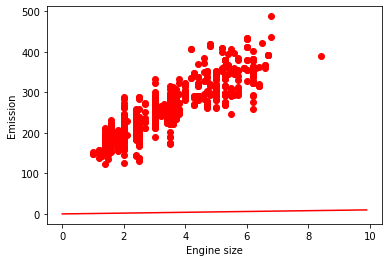

In [35]:
#plotting the trained data
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='red')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
#𝑦=𝑏+𝜃1𝑥1+𝜃2𝑥2

In [36]:
#EVALUATION
from sklearn.metrics import r2_score
x_test_poly = poly.fit_transform(x_test)
x_test_poly

array([[1.00000e+00, 2.21000e+02, 4.88410e+04],
       [1.00000e+00, 2.25000e+02, 5.06250e+04],
       [1.00000e+00, 2.02000e+02, 4.08040e+04],
       [1.00000e+00, 2.35000e+02, 5.52250e+04],
       [1.00000e+00, 2.60000e+02, 6.76000e+04],
       [1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.12000e+02, 4.49440e+04],
       [1.00000e+00, 2.46000e+02, 6.05160e+04],
       [1.00000e+00, 3.04000e+02, 9.24160e+04],
       [1.00000e+00, 3.06000e+02, 9.36360e+04],
       [1.00000e+00, 3.08000e+02, 9.48640e+04],
       [1.00000e+00, 2.85000e+02, 8.12250e+04],
       [1.00000e+00, 2.85000e+02, 8.12250e+04],
       [1.00000e+00, 2.81000e+02, 7.89610e+04],
       [1.00000e+00, 2.37000e+02, 5.61690e+04],
       [1.00000e+00, 3.80000e+02, 1.44400e+05],
       [1.00000e+00, 2.00000e+02, 4.00000e+04],
       [1.00000e+00, 2.00000e+02, 4.00000e+04],
       [1.00000e+00, 2.37000e+02, 5.61690e+04],
       [1.00000e+00, 2.00000e+02, 4.00000e+04],
       [1.00000e+00, 2.09000e+02, 4.3681

In [39]:
y_test_ = clf.predict(x_test_poly)


In [40]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_- y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test_ , y_test) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


Coefficients:  [[0.00000000e+00 1.00000000e+00 3.33066907e-16 1.11022302e-16]]
Intercept:  [5.32907052e-15]
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


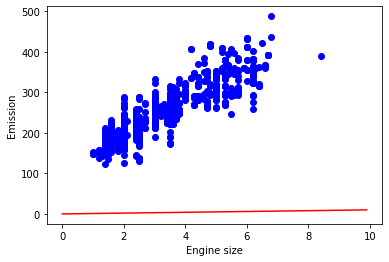

In [42]:
#checking if degree 3 returns better accuracy
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(x_train)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, y_train)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(x_test)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , y_test) )